In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.shape

(299, 13)

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

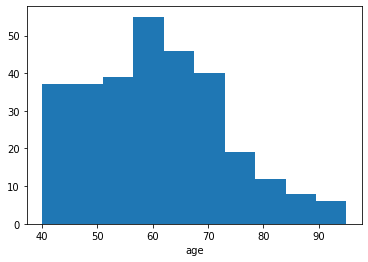

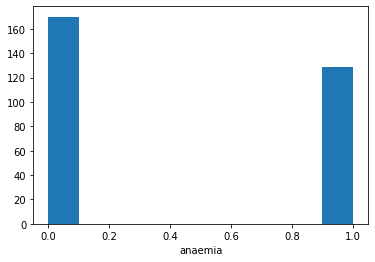

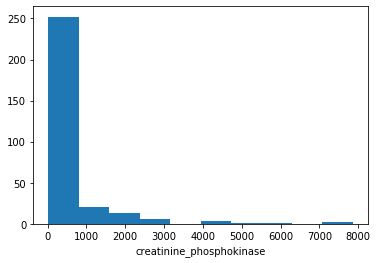

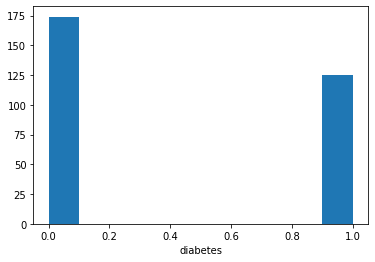

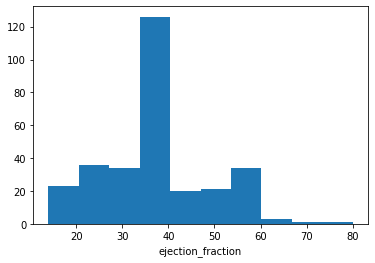

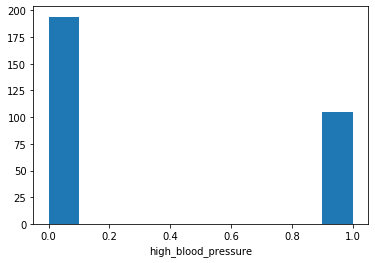

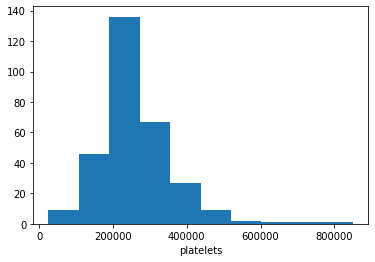

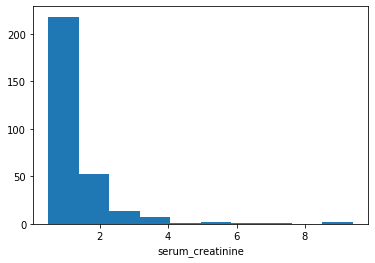

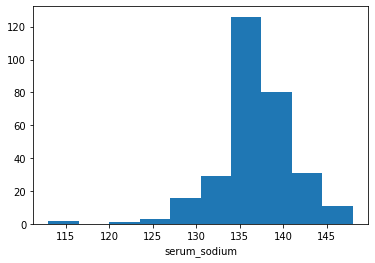

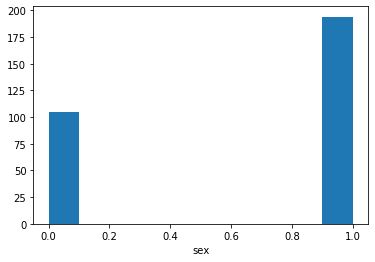

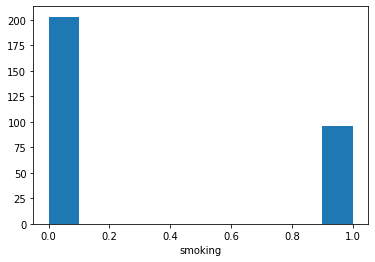

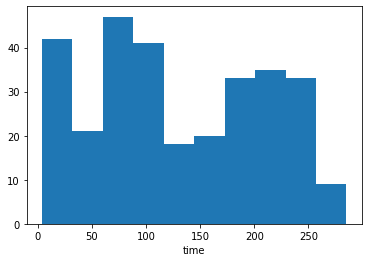

In [6]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
            'ejection_fraction', 'high_blood_pressure', 'platelets',
            'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

for i in features:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

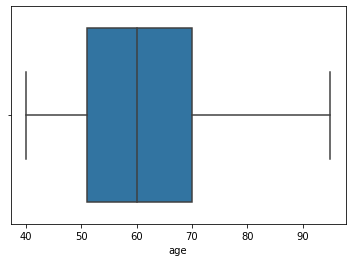

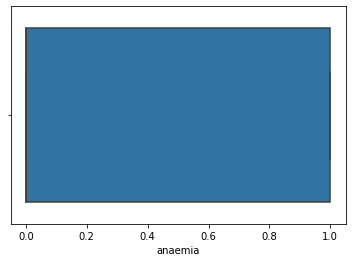

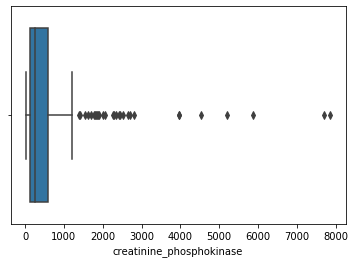

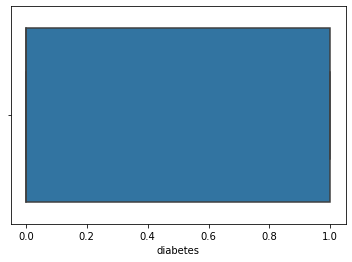

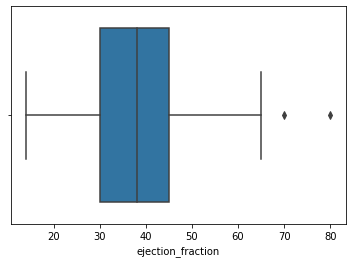

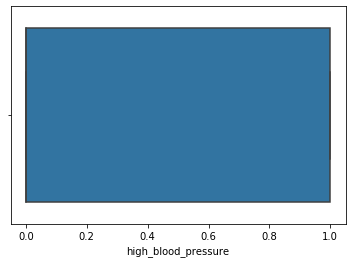

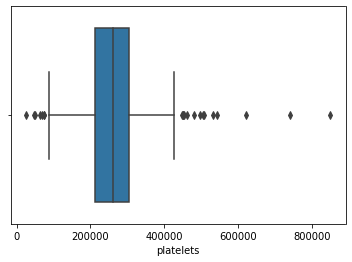

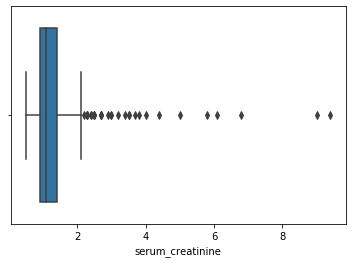

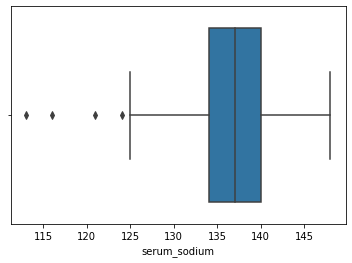

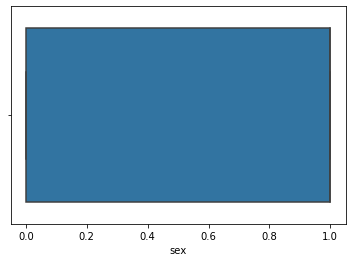

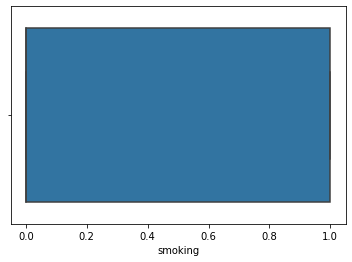

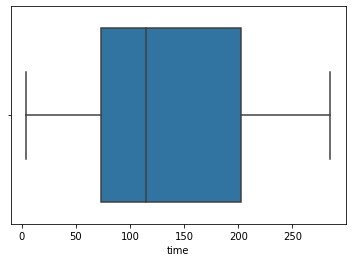

In [7]:
for i in features:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
# plt.boxplot()

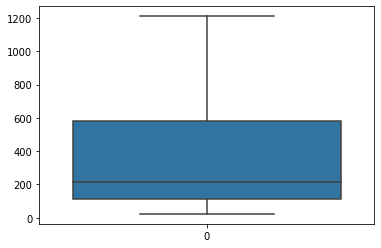

In [8]:
df = df[df.creatinine_phosphokinase<1300]
sns.boxplot(data=df.creatinine_phosphokinase)
plt.show()

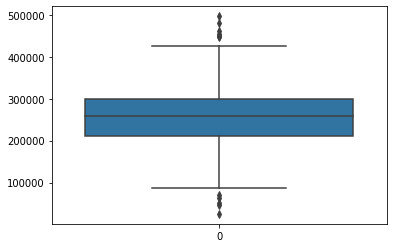

In [9]:
df = df[df.platelets<500000]
sns.boxplot(data=df.platelets)
plt.show()

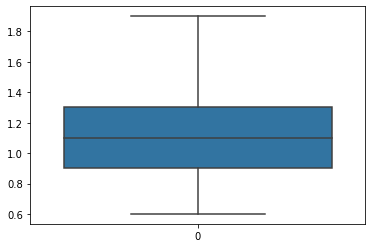

In [10]:
df = df[df.serum_creatinine<2.0]
sns.boxplot(data=df.serum_creatinine)
plt.show()

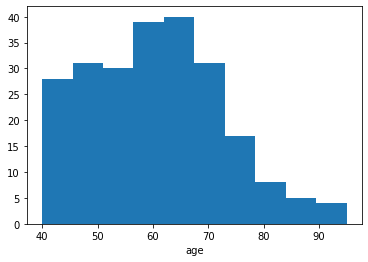

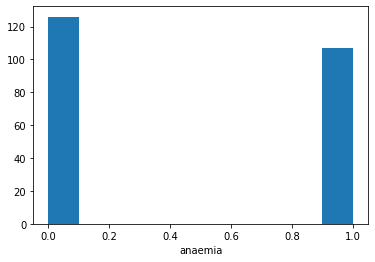

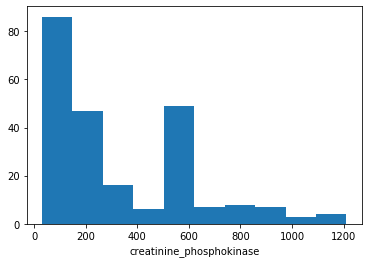

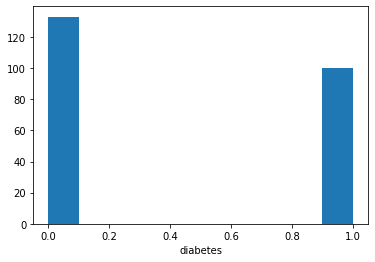

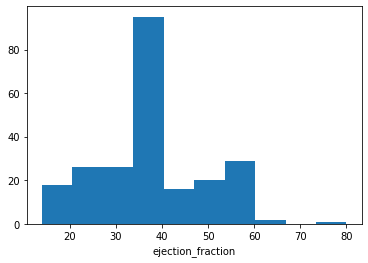

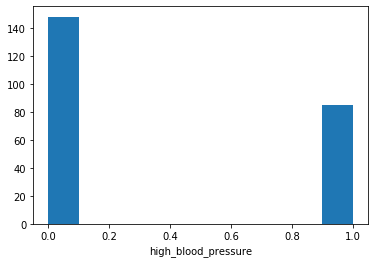

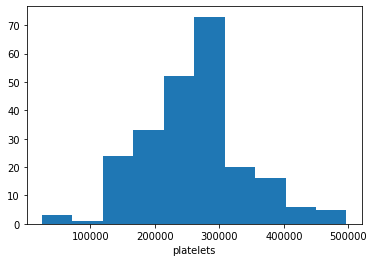

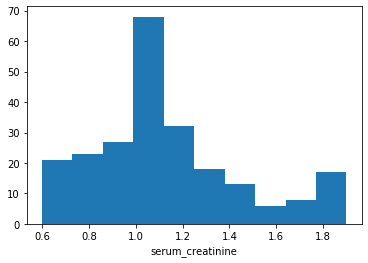

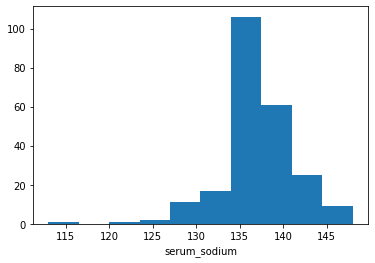

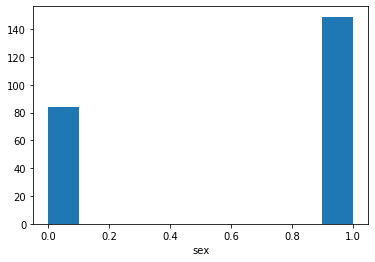

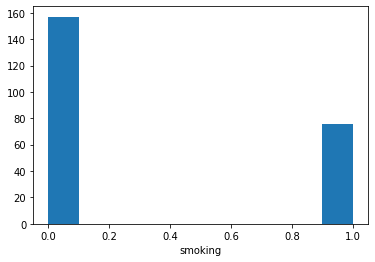

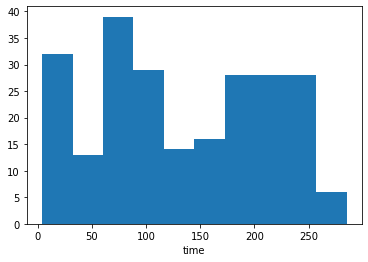

In [11]:
for i in features:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

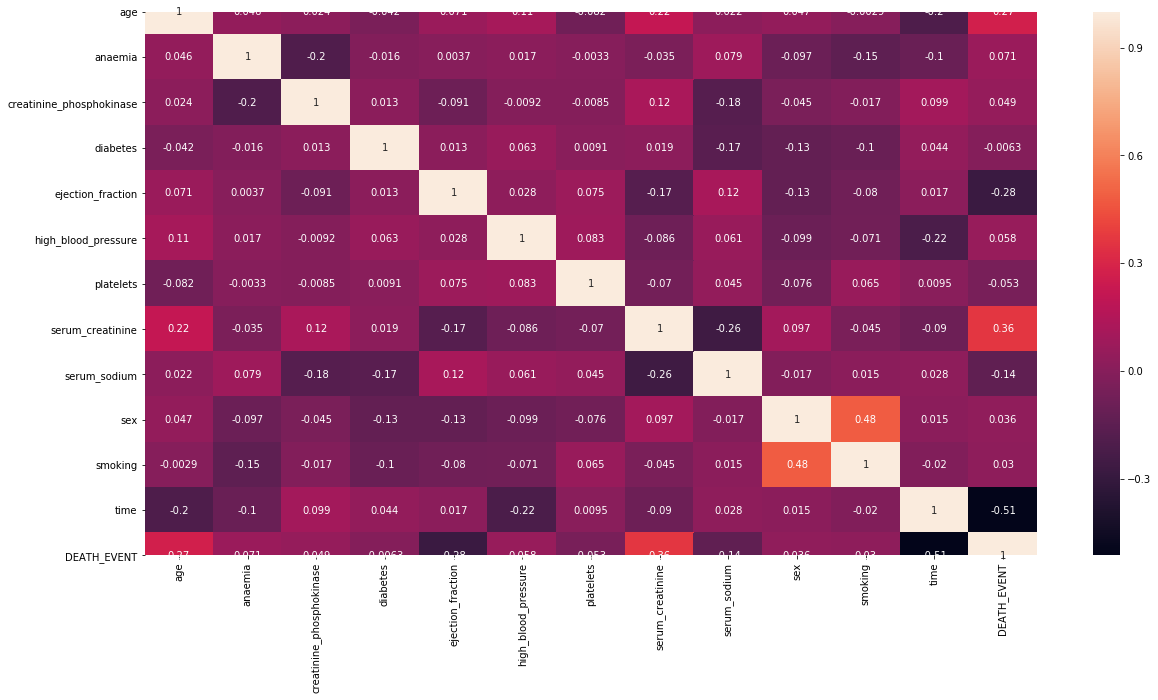

In [12]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [13]:
df.drop('sex', 1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,0,7,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,0,10,1
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,270,0


In [14]:
df.drop('time', 1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,0


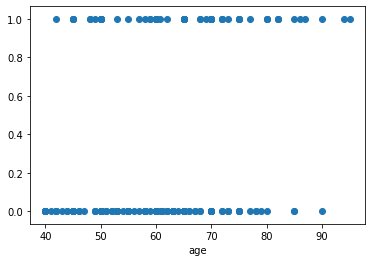

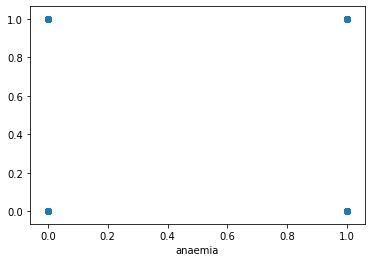

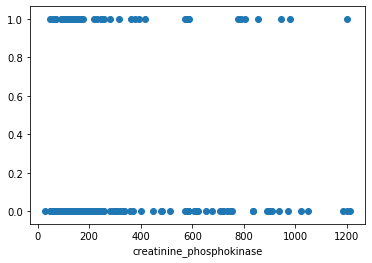

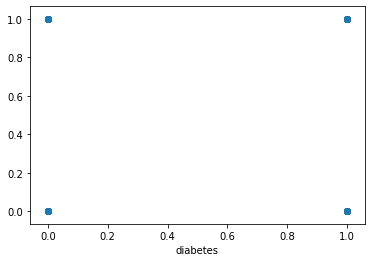

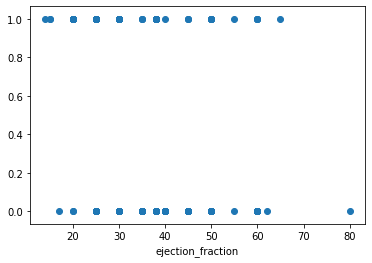

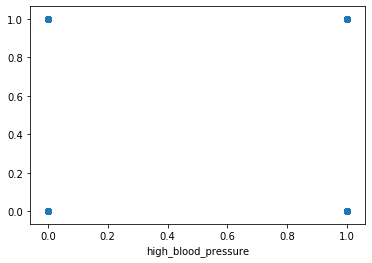

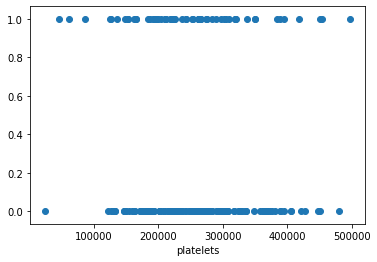

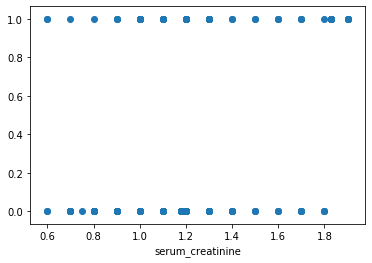

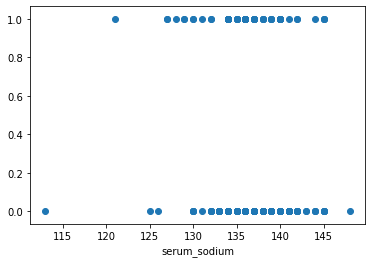

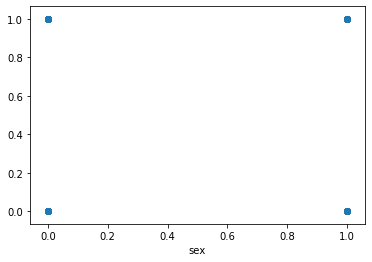

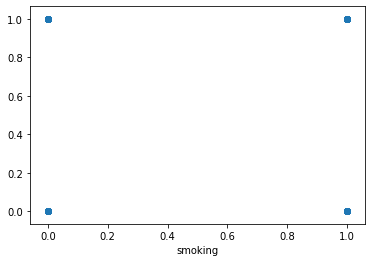

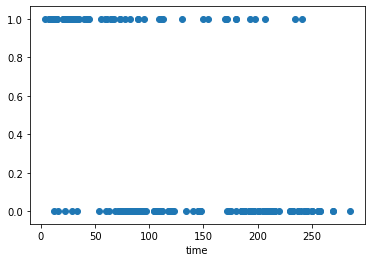

In [15]:
for i in features:
    plt.scatter(x=df[i], y=df.DEATH_EVENT)
    plt.xlabel(i)
    plt.show()

In [16]:
X = df[features]
y = df.DEATH_EVENT

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rfc_y_pred = rfc.predict(X_test)
rfc_y_pred = rfc_y_pred.reshape(-1,1)
rfc_y_pred.shape

(47, 1)

In [49]:
y_test = pd.DataFrame(y_test)

In [50]:
rfc.score(y_test, rfc_y_pred)

ValueError: Number of features of the model must match the input. Model n_features is 12 and input n_features is 1 

In [19]:
rfc.score(X_test, y_test)

0.851063829787234

In [23]:
gbc = GradientBoostingClassifier(max_depth=2, random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
gbc.score(X_test, y_test)

0.851063829787234